### TASK A: Top 100 word & Zipf's Law

In [1]:
import pandas as pd

# Load the models and brands mapping
mapping_df = pd.read_csv('car_models_and_brands.csv')

# Load the data from Data Scrapper Code
data_df = pd.read_csv('oldposts_data.csv')

# Create a dictionary for mapping models to brands
model_to_brand = {}
for _, row in mapping_df.iterrows():
    brand = row['Brand']
    models = row['Model'].split('|')
    for model in models:
        model_to_brand[model] = brand

model_to_brand['330i'] = 'bmw'
model_to_brand['325i'] = 'bmw'
model_to_brand['rx'] = 'lexus'
model_to_brand['ls'] = 'lexus'
model_to_brand['gs'] = 'lexus'
model_to_brand['es'] = 'lexus'
model_to_brand['g35'] = 'infiniti'

del model_to_brand['mercedes']

model_to_brand['volkswagen'] = model_to_brand.pop('volkwagen')

brand_fil = list(set(model_to_brand.values()))

# model_to_brand['s4'] = 'audi'
# model_to_brand['tlx'] = 'acura'
# model_to_brand['daytona'] = 'dodge'
# model_to_brand['wrangler'] = 'jeep'

In [2]:
rem_brand = ["car","seat","sedan","problem"]

brand_fil = [word for word in brand_fil if word not in rem_brand]
print(brand_fil)
data_df

['ford', 'volkswagen', 'mercedes', 'acura', 'nissan.', 'subaru', 'chevrolet', 'pontiac', 'mitsubishi', 'suzuki', 'nissan', 'volvo', 'honda', 'bmw', 'buick', 'hyundai', 'hyundai,', 'toyata', 'chrysler', 'volkwagen', 'hyndai kia', 'kia', 'audi', 'toyota', 'hyundai.', 'dodge', 'mazda', 'lexus', 'mercury', 'lincoln', 'cadillac', 'kia.', 'saturn', 'infiniti']


,Unnamed: 0,User_ID,Date,Comment
0,0,merc1,Mar-02,I personally think that with a few tweaks the ...
1,1,fredvh,Mar-02,I am debating a new purchase and these two are...
2,2,blueguydotcom,Mar-02,"Great handling, RWD, excellent engine and the ..."
3,3,hungrywhale,Mar-02,And no manual tranny. That may not matter to y...
4,4,riez,Mar-02,One beauty of BMW 3 Series is that there are s...
...,...,...,...,...
5980,5980,brightness04,Oct-06,"When I bought in 1988, fixed mortgage rates we..."
5981,5981,qbrozen,Oct-06,You won't get an argument from me.\n\nI'd neve...
5982,5982,qbrozen,Oct-06,"As Rocky point out, this is about SEDANS. Last..."
5983,5983,rockylee,Oct-06,"Rocky, I don't know how you get these ridiculo..."


In [3]:
data_df = data_df.drop(columns='Unnamed: 0')

In [4]:
data_df.head()

,User_ID,Date,Comment
0,merc1,Mar-02,I personally think that with a few tweaks the ...
1,fredvh,Mar-02,I am debating a new purchase and these two are...
2,blueguydotcom,Mar-02,"Great handling, RWD, excellent engine and the ..."
3,hungrywhale,Mar-02,And no manual tranny. That may not matter to y...
4,riez,Mar-02,One beauty of BMW 3 Series is that there are s...


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import re

# Extract the comment column
comments = data_df[data_df['Comment'].apply(lambda x: isinstance(x, str))]['Comment']

# Tokenize and preprocess the comments (remove punctuation and convert to lowercase)
def preprocesstext(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenize and convert to lowercase
    return words

# Tokenize and preprocess the comments
all_words = []
for comment in comments:
    words = preprocesstext(comment)
    all_words.extend(words)

# Calculate word frequencies
word_frequencies = pd.Series(all_words).value_counts()

In [6]:
print(word_frequencies)

the             32318
a               15058
and             12926
i               12556
to              12222
                ...  
amendment           1
constitution        1
farthest            1
millisecond         1
unpractical         1
Length: 22936, dtype: int64


### NEED TO CHECK ZIPFS LAW - MB

<Axes: xlabel='Log Rank', ylabel='Log of Word Frequency'>

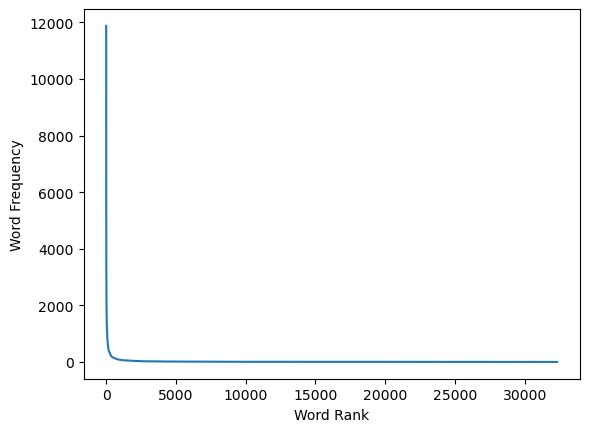

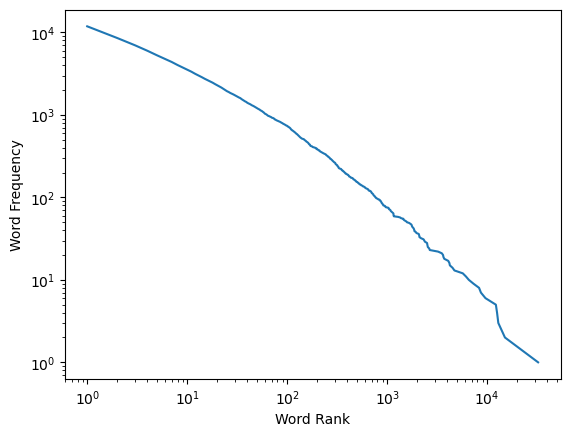

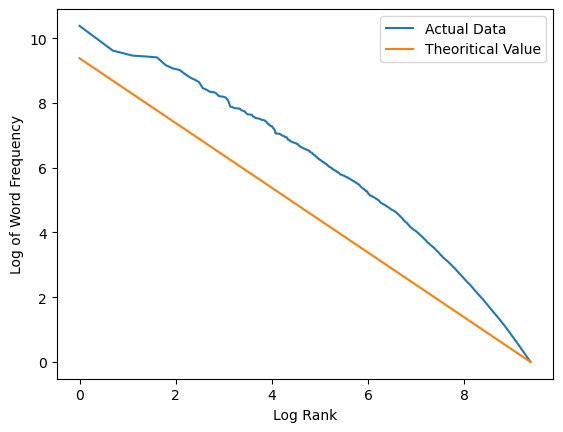

In [7]:
# Calculate word frequencies
word_frequencies = pd.Series(all_words).value_counts()


# Rank words by frequency
ranks = []
count = 1
for i in range(len(word_frequencies)):
    if (word_frequencies[i] == word_frequencies[i-1]) and i!= 0:
        ranks.append(ranks[i-1])
        count = count + 1
    elif word_frequencies[i] != word_frequencies[i-1] and i!= 0:
        ranks.append(ranks[i-1]+ count)
        count = 1
    else:
        ranks.append(count)

# Calculate the theoretical prediction for Zipf's Law
#total_words = len(all_words)
#theoretical_freq = total_words / ranks
zipf_const = ranks[-1] * word_frequencies[-1]
zipf_const
theoretical_freq = zipf_const / ranks

df_zipf = pd.DataFrame(ranks, word_frequencies.tolist())
df_zipf.plot(xlabel='Word Rank',ylabel='Word Frequency', legend=False)
df_zipf.plot(xlabel='Word Rank',ylabel='Word Frequency',logx=True,logy=True, legend=False)

df_zipf_log = pd.DataFrame({'Log Rank': np.log(ranks), 'Log Frequency': np.log(word_frequencies)})
ax = df_zipf_log.plot(x='Log Rank', y='Log Frequency', label='Actual Data', xlabel='Log of Word Rank', ylabel='Log of Word Frequency')

df_zipf_ideal = pd.DataFrame({'Log Rank': np.log(ranks), 'Log Zipf': np.log(zipf_const) - np.log(ranks)})
df_zipf_ideal.plot(x='Log Rank', y='Log Zipf', ax=ax, label='Theoritical Value')


### REVIEW BELOW CODE FOR ZIPFs LAW - MB

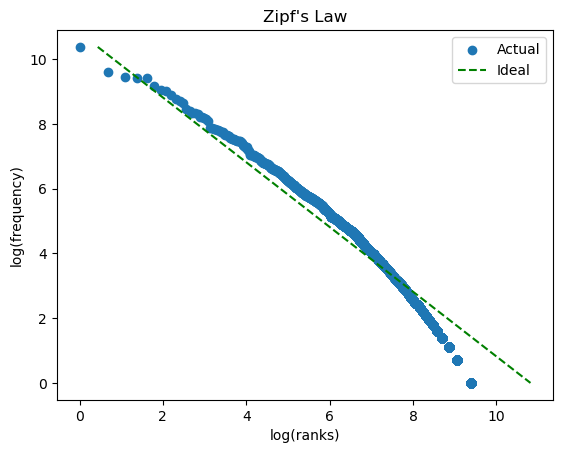

In [8]:
df_zipf = df_zipf.reset_index()

plt.scatter(np.log(df_zipf[0]), np.log(df_zipf['index']),label='Actual')
plt.plot(np.log(50000 / df_zipf['index']), np.log(df_zipf['index']), label='Ideal', linestyle='--',color='green')

# Add labels and title
plt.xlabel('log(ranks)')
plt.ylabel('log(frequency)')
plt.title("Zipf's Law")
plt.legend()
# Show the plot
plt.show()

In [9]:
word_frequencies = word_frequencies.to_frame()
word_frequencies = word_frequencies.reset_index()
word_frequencies

,index,0
0,the,32318
1,a,15058
2,and,12926
3,i,12556
4,to,12222
...,...,...
22931,amendment,1
22932,constitution,1
22933,farthest,1
22934,millisecond,1


In [10]:
import numpy as np

def zipf_cdf(r, N):
    return 1 - 1 / (r * np.log(N + 1))

import scipy.stats as stats

# Calculate the theoretical CDF values using the zipf_cdf function
N = len(word_frequencies)
word_frequencies['Theoretical_CDF'] = [zipf_cdf(r, N) for r in range(1, N + 1)]

# Perform the KS test
ks_statistic, p_value = stats.kstest(word_frequencies[0], word_frequencies['Theoretical_CDF'])

# Check the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Zipf's law is not supported by the data.")
else:
    print("Zipf's law is supported by the data.")


Zipf's law is not supported by the data.


## Empirically testing Zipf's law - CHECK AS PER ABOVE CODE

In [11]:
#Test empirically using regression

df_zipf_reg = pd.DataFrame({'Y': np.log(ranks), 'X': np.log(word_frequencies/zipf_const)})

import statsmodels.api as sm
model = sm.OLS(df_zipf_reg['Y'], df_zipf_reg['X']).fit()
print("\nStandard Error:\n", model.bse)
print(model.summary())

TypeError: unsupported operand type(s) for /: 'str' and 'int'

From the results of regression above for $\log{r} = \theta\log{\frac{f}{f_nr_n}} + \epsilon$, we can say that $\theta \approx -1$ with more than 99.99% confidence interval.<br> The $R^2$ value for this model is 0.996, which means that large amount of the variability is captured and the model fits well to this data.<br> P-value of 0 implies that $\theta$ is statistically significantly different than 0 (null hypothesis that $\theta = 0$)

In [15]:
# Plot the most common 100 words and the theoretical prediction
#top_100_words = word_frequencies.head(100)
#top_100_ranks = np.arange(1, 101)  # Adjust the ranks to match the top 100 words
plt.figure(figsize=(12, 6))
plt.plot(np.log(ranks[:100]), np.log(word_frequencies.head(100)), marker='o', label='Actual Data')
plt.plot(np.log(ranks[:100]), np.log(theoretical_freq[:100]), linestyle='--', label='Theoretical Prediction')
plt.title("Zipf's Law Test")
plt.xlabel("Log(Rank)")
plt.ylabel("Log(Frequency)")
plt.legend()
plt.grid(True)
plt.show()

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

<Figure size 1200x600 with 0 Axes>

### TASK B: Word frequency table after removing stop words

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords (you only need to do this once)
nltk.download('stopwords')

# Extract the comment column
comments = data_df[data_df['Comment'].apply(lambda x: isinstance(x, str))]['Comment']

# Get the NLTK English stop words
stop_words = set(stopwords.words('english'))

# Tokenize and preprocess the comments (remove punctuation, convert to lowercase, and remove stop words)
def preprocesstext(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenize and convert to lowercase
    nswords = [word for word in words if word not in stop_words]
    nswords = [model_to_brand.get(word, word) for word in nswords]
    return list(set(nswords))

# Tokenize and preprocess the comments, removing stop words
words_nostop = []
for comment in comments:
    words = preprocesstext(comment)
    words_nostop.extend(words)

# Calculate word frequencies
words_nostop_freq = pd.Series(words_nostop).value_counts()

wnf_df = pd.DataFrame(words_nostop_freq)
wnf_df = wnf_df.reset_index()
wnf_df = wnf_df.rename(columns={'index': 'words', 0: 'frequency'})

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/milindbhatia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/var/folders/2q/jjvry_s10q578x_6qd2kc8j00000gn/T/ipykernel_23446/2062774763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_bd_df['words'] = top_bd_df['words'].replace(key_b)


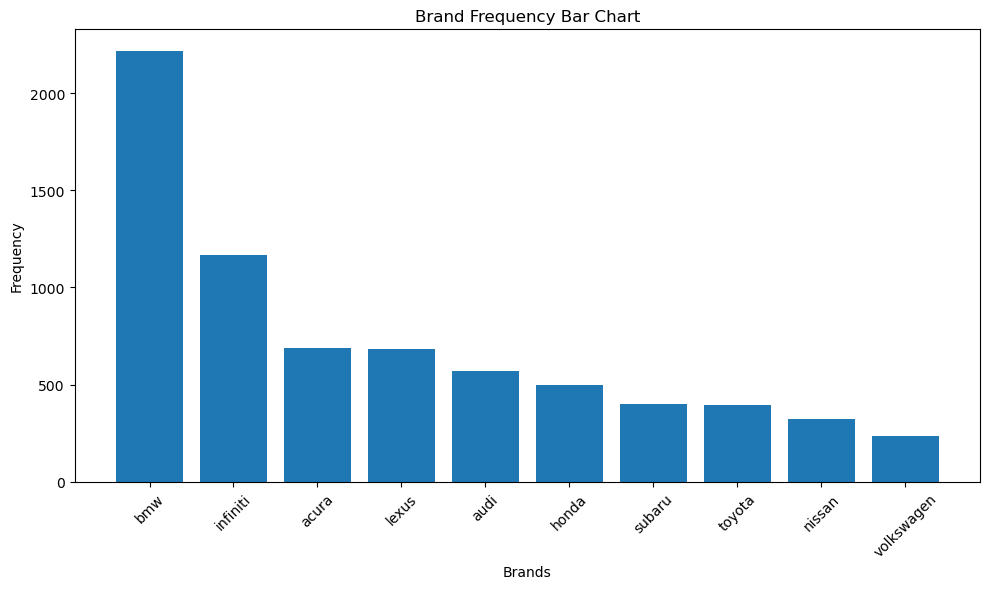

In [17]:
top_bd_df = wnf_df[wnf_df['words'].isin(brand_fil)]
key_b = {"volkwagen":"volkswagen", "mercedes-benz":"mercedes"}
top_bd_df['words'] = top_bd_df['words'].replace(key_b)
top_bd_df_f = top_bd_df.groupby("words").sum().reset_index().sort_values(by='frequency',ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(top_bd_df_f['words'].head(10), top_bd_df_f['frequency'].head(10))
plt.xlabel('Brands')
plt.ylabel('Frequency')
plt.title('Brand Frequency Bar Chart')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

In [18]:
top_10_df = top_bd_df_f.head(10)
top_10_df

,words,frequency
2,bmw,2217
12,infiniti,1167
0,acura,688
14,lexus,685
1,audi,568
9,honda,496
23,subaru,403
25,toyota,397
20,nissan,322
26,volkswagen,238


### TASK C: LIFT Analysis

In [19]:
def preprocesstextdistance(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenize and convert to lowercase
    nswords = [word for word in words if word not in stop_words]
    nswords = [model_to_brand.get(word, word) for word in nswords]
    return nswords

In [20]:
token_df = pd.DataFrame(comments)
token_df['Tokenized_Message'] = token_df['Comment'].map(preprocesstext)
token_df['Tokenized_MessageDistance'] = token_df['Comment'].map(preprocesstextdistance)

# def replace_words_in_list(word_list, replacements):
#     ls = [replacements.get(word, word) for word in word_list]
#     return list(set(ls))

# token_df['Mapped_words'] = token_df['Tokenized_Message'].apply(lambda x: replace_words_in_list(x, model_to_brand))


In [21]:
word_distance = 9

def distance_thresh(words_list, word1, word2, max_distance):
    indices_word1 = [i for i, word in enumerate(words_list) if word == word1]
    indices_word2 = [i for i, word in enumerate(words_list) if word == word2]
    for idx1 in indices_word1:
        for idx2 in indices_word2:
            if abs(idx1 - idx2) <= max_distance:
                return True
    return False

def lift_analysis(data,data_dist,word_A,word_B,max_distance):
    if (word_A == word_B):
        return '-'
    else:
        N = data.shape[0]
        N_A = sum(1 for review in data if word_A in review)
        N_B = sum(1 for review in data if word_B in review)
        N_A_and_B = sum(1 for review in data_dist if distance_thresh(review, word_A, word_B, max_distance) and word_A in review and word_B in review)
    
        lift = (N * N_A_and_B) / (N_A * N_B)

        return np.round(lift,4)

df_lift = []

for index, brand1 in top_10_df.iterrows():
    for index,brand2 in top_10_df.iterrows():
        df_lift.append(lift_analysis(token_df['Tokenized_Message'],token_df['Tokenized_MessageDistance'],brand1['words'],brand2['words'],word_distance))


In [22]:
import numpy as np
lift_np = np.reshape(df_lift,(10,10))
lift_df = pd.DataFrame(data= lift_np)
for i in range(10):
    lift_df = lift_df.rename(columns = {i: top_10_df.iloc[i, 0]})
    lift_df = lift_df.rename(index = {i: top_10_df.iloc[i, 0]})
lift_df


,bmw,infiniti,acura,lexus,audi,honda,subaru,toyota,nissan,volkswagen
bmw,-,0.9924,0.7416,1.0444,1.2215,0.479,0.288,0.4352,0.4695,0.5112
infiniti,0.9924,-,1.3194,1.2653,0.9481,0.5066,0.42,0.323,1.0512,0.4855
acura,0.7416,1.3194,-,1.5874,1.164,1.3855,1.8132,0.3506,0.7835,0.4118
lexus,1.0444,1.2653,1.5874,-,1.1537,0.4228,0.2385,1.1664,0.5427,0.3102
audi,1.2215,0.9481,1.164,1.1537,-,0.3824,0.4968,0.345,0.2945,2.3069
honda,0.479,0.5066,1.3855,0.4228,0.3824,-,0.3892,3.6473,2.6232,0.6426
subaru,0.288,0.42,1.8132,0.2385,0.4968,0.3892,-,0.4115,0.4612,0.6151
toyota,0.4352,0.323,0.3506,1.1664,0.345,3.6473,0.4115,-,2.7623,1.1597
nissan,0.4695,1.0512,0.7835,0.5427,0.2945,2.6232,0.4612,2.7623,-,1.2098
volkswagen,0.5112,0.4855,0.4118,0.3102,2.3069,0.6426,0.6151,1.1597,1.2098,-


### Task D: MDS Plot

In [23]:
lift_df = lift_df.replace(to_replace='-',value=1)
lift_df = lift_df.astype(float)
lift_df

,bmw,infiniti,acura,lexus,audi,honda,subaru,toyota,nissan,volkswagen
bmw,1.0000,0.9924,0.7416,1.0444,1.2215,0.4790,0.2880,0.4352,0.4695,0.5112
infiniti,0.9924,1.0000,1.3194,1.2653,0.9481,0.5066,0.4200,0.3230,1.0512,0.4855
acura,0.7416,1.3194,1.0000,1.5874,1.1640,1.3855,1.8132,0.3506,0.7835,0.4118
lexus,1.0444,1.2653,1.5874,1.0000,1.1537,0.4228,0.2385,1.1664,0.5427,0.3102
audi,1.2215,0.9481,1.1640,1.1537,1.0000,0.3824,0.4968,0.3450,0.2945,2.3069
honda,0.4790,0.5066,1.3855,0.4228,0.3824,1.0000,0.3892,3.6473,2.6232,0.6426
subaru,0.2880,0.4200,1.8132,0.2385,0.4968,0.3892,1.0000,0.4115,0.4612,0.6151
toyota,0.4352,0.3230,0.3506,1.1664,0.3450,3.6473,0.4115,1.0000,2.7623,1.1597
nissan,0.4695,1.0512,0.7835,0.5427,0.2945,2.6232,0.4612,2.7623,1.0000,1.2098
volkswagen,0.5112,0.4855,0.4118,0.3102,2.3069,0.6426,0.6151,1.1597,1.2098,1.0000


In [24]:
from sklearn.manifold import MDS

def invert_value(x):
    if x == 0:
        return np.NaN
    return 1/x

lift_df_inv = lift_df.applymap(invert_value)

lift_df_inv = lift_df_inv.replace(to_replace=np.NaN,value=200)

for i in range(len(lift_df_inv)):
    for j in range(len(lift_df_inv)):
            lift_df_inv.iloc[i, j] = lift_df_inv.iloc[i, j] ** 0.2  ## Scaled values to get better MDS distances


lift_df_inv

,bmw,infiniti,acura,lexus,audi,honda,subaru,toyota,nissan,volkswagen
bmw,1.000000,1.001527,1.061613,0.991349,0.960774,1.158598,1.282689,1.181034,1.163250,1.143620
infiniti,1.001527,1.000000,0.946073,0.954028,1.010716,1.145690,1.189461,1.253601,0.990063,1.155479
acura,1.061613,0.946073,1.000000,0.911723,0.970084,0.936869,0.887791,1.233212,1.050007,1.194161
lexus,0.991349,0.954028,0.911723,1.000000,0.971810,1.187881,1.331994,0.969685,1.130025,1.263780
audi,0.960774,1.010716,0.970084,0.971810,1.000000,1.211983,1.150174,1.237189,1.276977,0.846047
honda,1.158598,1.145690,0.936869,1.187881,1.211983,1.000000,1.207718,0.771979,0.824582,1.092476
subaru,1.282689,1.189461,0.887791,1.331994,1.150174,1.207718,1.000000,1.194335,1.167407,1.102074
toyota,1.181034,1.253601,1.233212,0.969685,1.237189,0.771979,1.194335,1.000000,0.816105,0.970802
nissan,1.163250,0.990063,1.050007,1.130025,1.276977,0.824582,1.167407,0.816105,1.000000,0.962625
volkswagen,1.143620,1.155479,1.194161,1.263780,0.846047,1.092476,1.102074,0.970802,0.962625,1.000000


In [25]:
#perform multi-dimensional scaling
mds = MDS(random_state=0)
scaled_df = mds.fit_transform(lift_df_inv)


/Users/milindbhatia/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/Users/milindbhatia/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


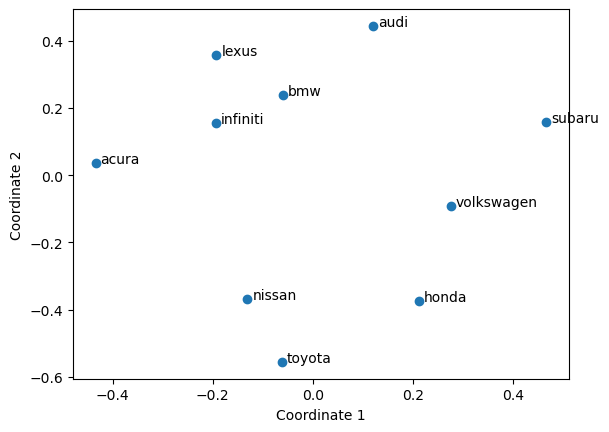

In [26]:
import matplotlib.pyplot as plt

#create scatterplot
plt.scatter(scaled_df[:,0], scaled_df[:,1])

#add axis labels
plt.xlabel('Coordinate 1')
plt.ylabel('Coordinate 2')

#add lables to each point
for i, txt in enumerate(top_10_df['words']):
    plt.annotate(txt, (scaled_df[:,0][i]+.01, scaled_df[:,1][i]))

#display scatterplot
plt.show()

### Task F: Attributes

performance, luxury, price, engine, handling, interior, power, sport, hp, awd, rwd, fwd, speed, torque

In [ ]:
#top_5_attr = ['sport','luxury','hybrid','speed','performance','price','engine','premium','cost','power','interior','hp','awd','rwd','fwd','torque']
top_5_attr = ['sport','luxury','hybrid','speed','performance','engine','premium','cost','power','interior']
top_5_attr_df = wnf_df[wnf_df['words'].isin(top_5_attr)]
top_5_attr_df = top_5_attr_df.rename(columns={0: 'frequency'})

top_5_attr_df

,words,frequency
18,performance,797
38,luxury,585
43,engine,517
62,interior,430
64,power,427
77,sport,381
130,speed,290
231,cost,196
374,premium,131
1429,hybrid,31


In [ ]:

df_lift_attr = []

for index, brand1 in top_10_df.iterrows():
    for index, attr in top_5_attr_df.iterrows():
        df_lift_attr.append(lift_analysis(token_df['Mapped_words'],brand1['words'],attr['words'],word_distance))

In [ ]:
lift_attr_np = np.reshape(df_lift_attr,(10,10))
lift_attr_df = pd.DataFrame(data= lift_attr_np)
for i in range(10):
    lift_attr_df = lift_attr_df.rename(columns = {i: top_10_df.iloc[i, 0]})
    lift_attr_df = lift_attr_df.rename(index = {i: top_5_attr_df.iloc[i, 0]})
lift_attr_df

,bmw,infiniti,acura,lexus,audi,honda,subaru,toyota,nissan,volkswagen
performance,0.7689,0.4153,0.0522,0.4897,0.6828,0.0567,0.5399,0.4132,1.5044,0.2613
luxury,0.7207,0.4734,0.0595,1.9441,0.2402,0.0538,0.4421,0.1570,1.1353,0.1654
engine,0.1310,0.5056,0.6226,0.9306,0.6723,0.4566,0.0600,0.3994,0.0000,0.8419
interior,0.1096,0.9708,0.6253,0.2235,1.3505,0.6192,0.0301,0.7132,0.6003,1.4092
power,0.1058,0.7385,0.6930,0.4411,1.6780,0.7744,0.0000,0.3763,0.4826,0.6798
sport,0.2725,0.3300,0.5601,0.6735,0.5369,0.4434,0.0416,0.4309,0.2763,1.9462
speed,1.2671,1.5486,0.3160,0.4490,0.5217,0.5067,0.0512,0.2273,0.2267,0.0000
cost,0.2459,0.5927,0.8165,0.5610,0.6708,0.6727,0.0000,0.2307,0.0000,1.4589
premium,0.9795,0.9532,0.6112,0.4755,0.6094,0.3415,0.2564,0.3793,0.1419,0.5996
hybrid,0.4888,0.9686,0.1370,1.5648,0.4976,0.0000,0.2442,0.0000,1.0813,0.0000


In [ ]:
top_5_attr = ['sport','luxury','hybrid','speed','performance','engine','premium','cost','power','interior']
#Updated after change in data structure - USE THIS - >> performance, luxury, price, engine, handling, interior, power, sport, hp, awd, rwd, fwd, speed, torque